In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [80]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [82]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [83]:
#Create Dummy values for categorical features
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [84]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [85]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [86]:
#Concat The dataframes
X=pd.concat([X,geography,gender],axis=1)

In [87]:
#Drop uneccesary columns
X=X.drop(['Geography','Gender'],axis=1)

In [88]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [91]:
#Building the model
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import PReLU,LeakyReLU,ELU
from keras.layers import Dropout

In [67]:
!pip install tensorflow

In [92]:
X_train.shape

(8000, 11)

In [93]:
X_test.shape

(2000, 11)

In [94]:
#Initializing the ANN
classifier=Sequential()

In [95]:
#Adding the input Layer and the first hidden Layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
#classifier.add(Dropout(0.3))

In [96]:
#Adding the second Layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [97]:
#Adding the Output Layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [98]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [99]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 4s 5ms/step - loss: 0.5673 - accuracy: 0.7667 - val_loss: 0.4939 - val_accuracy: 0.7982
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4636 - accuracy: 0.8087 - val_loss: 0.4518 - val_accuracy: 0.8084
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4358 - accuracy: 0.8153 - val_loss: 0.4390 - val_accuracy: 0.8080
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4257 - accuracy: 0.8164 - val_loss: 0.4315 - val_accuracy: 0.8107
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4191 - accuracy: 0.8210 - val_loss: 0.4272 - val_accuracy: 0.8156
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4152 - accuracy: 0.8218 - val_loss: 0.4242 - val_accuracy: 0.8145
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4113 - accuracy: 0.8231 - val_loss: 0.4217 - val_accuracy: 0.8152
Epoch 

In [100]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


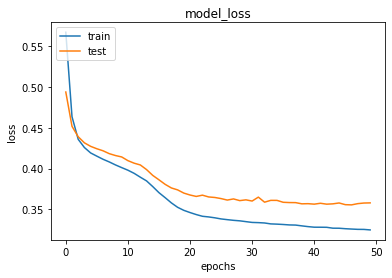

In [101]:
# Summarize the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

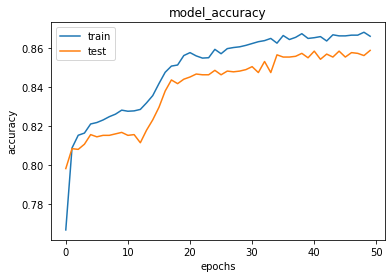

In [102]:
# Summarize the loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [44]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [45]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [47]:
cm

array([[1518,   77],
       [ 206,  199]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score=accuracy_score(y_test,y_pred)

In [50]:
score

0.8585